In [1]:
# Import libraries
import gspread
import pandas as pd
import plotly
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from speakerAnalysis import speakerAnalysisProject

from importlib import reload
reload(speakerAnalysisProject)

<module 'speakerAnalysis.speakerAnalysisProject' from '/home/seth/analysis/EDI/speakerAnalysis/speakerAnalysisProject.py'>

In [2]:
# Find key for accessing gspread api
key = speakerAnalysisProject.readkeyfile('.keys')

In [3]:
# Use gspread api to access spreadsheet
gc = gspread.api_key(key[0])

sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/10vC4mm2HWrlcGIY72Or04t9A3uDUTKhudUAIyPmkF8o/edit?gid=0#gid=0")

print(sh.sheet1.get('A1'))

[['Speaker']]


In [4]:
# Convert spreadsheet into pandas data frame
data = sh.sheet1.get_all_values()
headers = data.pop(0)

df = speakerAnalysisProject.convertGStoPandas(data,headers)
print(df.columns)

Index(['Speaker', 'EDI member', 'Date', 'Type', 'CV?', 'UndergraduateName',
       'UndergraduateCategory', 'GraduateName', 'GraduateCategory',
       'Post-docName', 'Post-docCategory', 'InstitutionName',
       'InstitutionCategory', 'Private/Public', 'Ivy/Other'],
      dtype='object', name=0)


In [5]:
# Fraction of entries from an R1 instituion
notempty = df['InstitutionCategory']!=''
r1 = df['InstitutionCategory'] == 'R1'
print(sum(r1)/sum(notempty))

# Fraction of entries from an R1 undergraduate
notempty = df['Post-docCategory']!=''
r1 = df['Post-docCategory'] == 'R1'
print(sum(r1)/sum(notempty))

# Fraction of entries from an R1 graduate
notempty = df['GraduateCategory']!=''
r1 = df['GraduateCategory'] == 'R1'
print(sum(r1)/sum(notempty))

# Fraction of entries from an R1 undergraduate
notempty = df['UndergraduateCategory']!=''
r1 = df['UndergraduateCategory'] == 'R1'
print(sum(r1)/sum(notempty))

0.7307692307692307
0.5384615384615384
0.6538461538461539
0.5769230769230769


In [6]:
# For presenting distributions over all encountered instituions
ppi = 72
name_cols=['UndergraduateName','GraduateName','Post-docName','InstitutionName']
tempDf = pd.unique(df[name_cols].values.ravel('K'))

x=tempDf

widthHisto = 14
heightHisto = 4

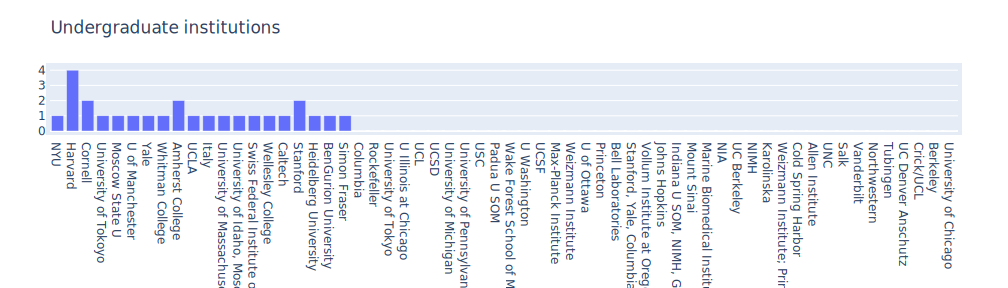

In [7]:
# Distribution of undergraduate institutions over all encountered institutions
y = []
for i in range(len(x)):
    y.append(sum(df['UndergraduateName']==x[i]))
fig = plotly.graph_objects.Figure(plotly.graph_objects.Bar(x=x, y=y))
fig.update_layout(
    title='Undergraduate institutions',
    autosize=False,
    width=widthHisto*ppi,
    height=heightHisto*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show(renderer='svg')
fig.write_image("/mnt/Lisberger/Presentations/Retreat/UndergraduateDistribution.svg")


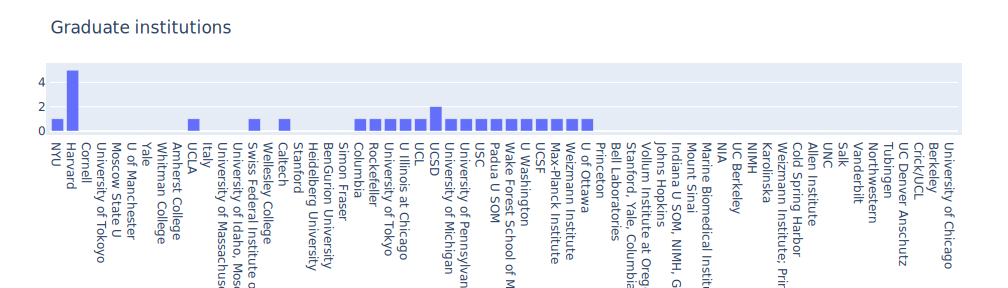

In [8]:
# Distribution of Graduate institutions over all encountered institutions
y = []
for i in range(len(x)):
    y.append(sum(df['GraduateName']==x[i]))
fig = plotly.graph_objects.Figure(plotly.graph_objects.Bar(x=x, y=y))
fig.update_layout(
    title='Graduate institutions',
    autosize=False,
    width=widthHisto*ppi,
    height=heightHisto*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show(renderer='svg')
fig.write_image("/mnt/Lisberger/Presentations/Retreat/GraduateDistribution.svg")



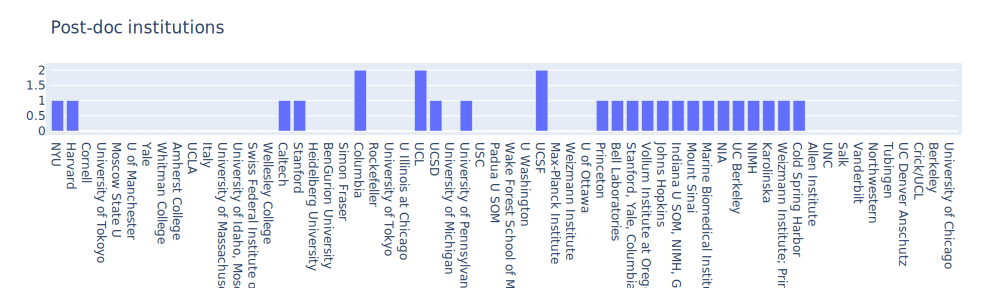

In [9]:
# Distribution of post-doc institutions over all encountered institutions
y = []
for i in range(len(x)):
    y.append(sum(df['Post-docName']==x[i]))
fig = plotly.graph_objects.Figure(plotly.graph_objects.Bar(x=x, y=y))
fig.update_layout(
    title='Post-doc institutions',
    autosize=False,
    width=widthHisto*ppi,
    height=heightHisto*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show(renderer='svg')
fig.write_image("/mnt/Lisberger/Presentations/Retreat/PostDocDistribution.svg")

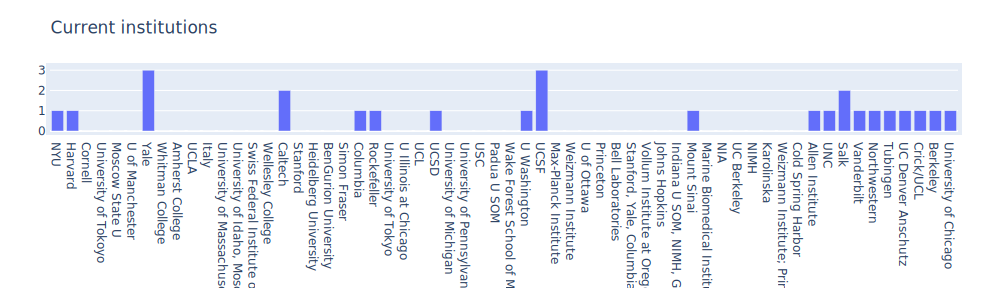

In [10]:
# Distribution of current institutions over all encountered institutions
y = []
for i in range(len(x)):
    y.append(sum(df['InstitutionName']==x[i]))
fig = plotly.graph_objects.Figure(plotly.graph_objects.Bar(x=x, y=y))
fig.update_layout(
    title='Current institutions',
    autosize=False,
    width=widthHisto*ppi,
    height=heightHisto*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show(renderer='svg')
fig.write_image("/mnt/Lisberger/Presentations/Retreat/CurrentDistribution.svg")

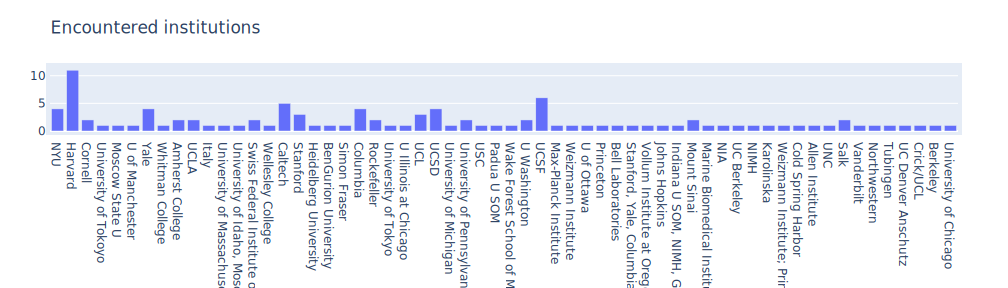

In [32]:
# Distribution of encountered institutions
y = []
for i in range(len(x)):
    y.append(sum(pd.concat([df['UndergraduateName'],df['GraduateName'],df['Post-docName'],df['InstitutionName']])==x[i]))
fig = plotly.graph_objects.Figure(plotly.graph_objects.Bar(x=x, y=y))
fig.update_layout(
    title='Encountered institutions',
    autosize=False,
    width=widthHisto*ppi,
    height=heightHisto*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
fig.show(renderer='svg')
fig.write_image("/mnt/Lisberger/Presentations/Retreat/EcounteredDistribution.svg")

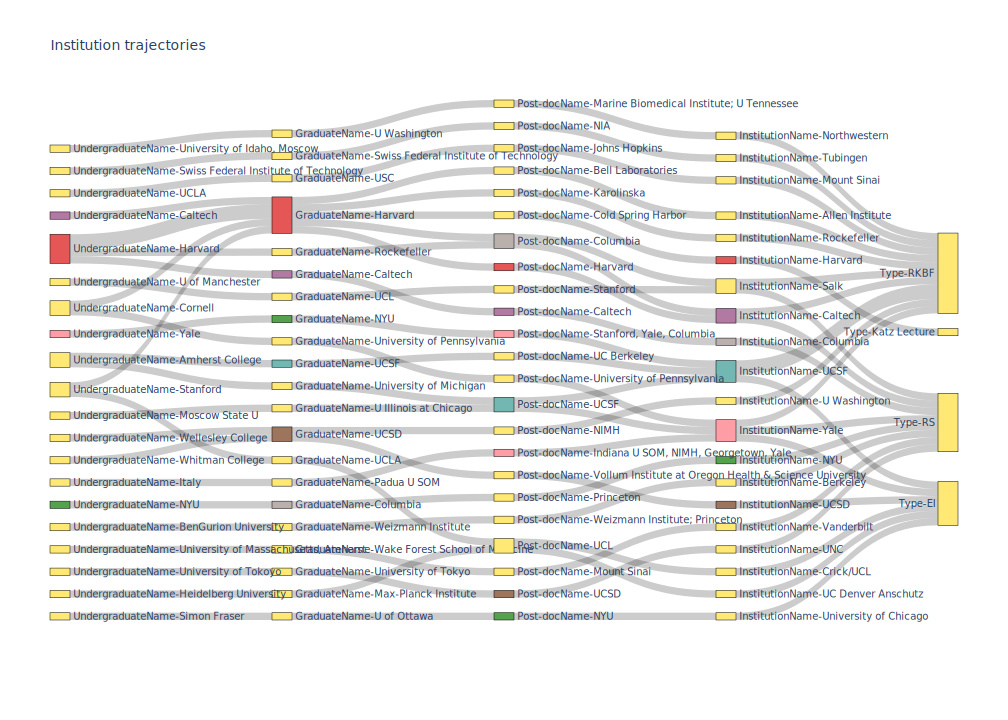

In [12]:
# Institution trajectories
widthTrajectories = 14
heightTrajectories = 10

fig = speakerAnalysisProject.genSankey(df,cat_cols=['UndergraduateName','GraduateName','Post-docName','InstitutionName','Type'],title='Institution trajectories',colorScheme='Name')
handle = plotly.graph_objects.Figure(fig)
handle.update_layout(
    autosize=False,
    width=widthTrajectories*ppi,
    height=heightTrajectories*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/InstitutionTrajectories.svg")


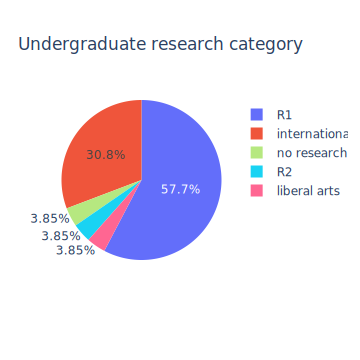

In [13]:
# For plotting pie charts of Carnegie research categories
colorPalette = [
    '#636EFA',
    '#EF553B',
    '#00CC96',
    '#AB63FA',
    '#FFA15A',
    '#19D3F3',
    '#FF6692',
    '#B6E880',
    '#FF97FF',
    '#FECB52',
    '#306998',
    ]

widthPie = 5
heightPie = 5

# Undergraduate reserach categories
handle = px.pie(df,names='UndergraduateCategory',
                    color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[7], colorPalette[5], colorPalette[6]],
                    title='Undergraduate research category'
                )
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/UndergraduateReserachCategory.svg")


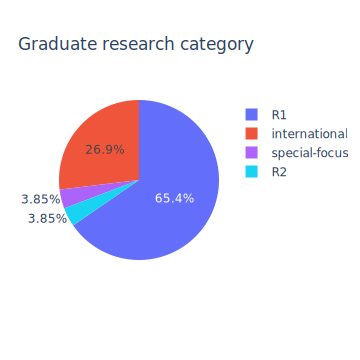

In [14]:
# Graduate reserach categories
handle = px.pie(df,names='GraduateCategory',
                        color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[3], colorPalette[5]],
                    title='Graduate research category'
                )
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/GraduateReserachCategory.svg")


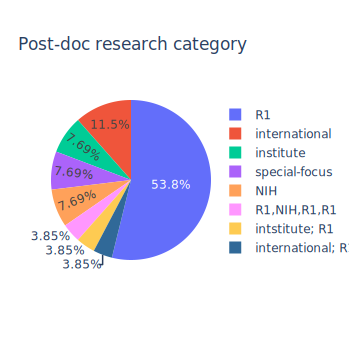

In [15]:
# Post-doc reserach categories
handle = px.pie(df,names='Post-docCategory',
                        color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[2], colorPalette[3], colorPalette[4], colorPalette[8], colorPalette[9], colorPalette[10]],
                        title='Post-doc research category'
                        )
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/PostDocReserachCategory.svg")


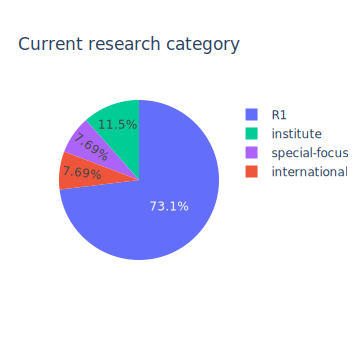

In [16]:
# Current reserach categories
handle = px.pie(df,names='InstitutionCategory',
                color_discrete_sequence=[colorPalette[0], colorPalette[2], colorPalette[3], colorPalette[1]],
                title='Current research category'
                )
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/CurrentReserachCategory.svg")

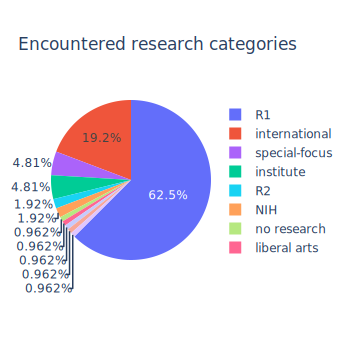

In [17]:
# Encountered reserach categories
cols = ['UndergraduateCategory','GraduateCategory','Post-docCategory','InstitutionCategory']
temp = []
for cs in cols:
    temp.extend(df[cs].tolist())

tempDf = pd.DataFrame({'Category':temp})
handle = px.pie(tempDf,names='Category',
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[3], colorPalette[2], colorPalette[5], colorPalette[4], colorPalette[7], colorPalette[6]],
                title='Encountered research categories'
                )
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/EncounteredReserachCategory.svg")

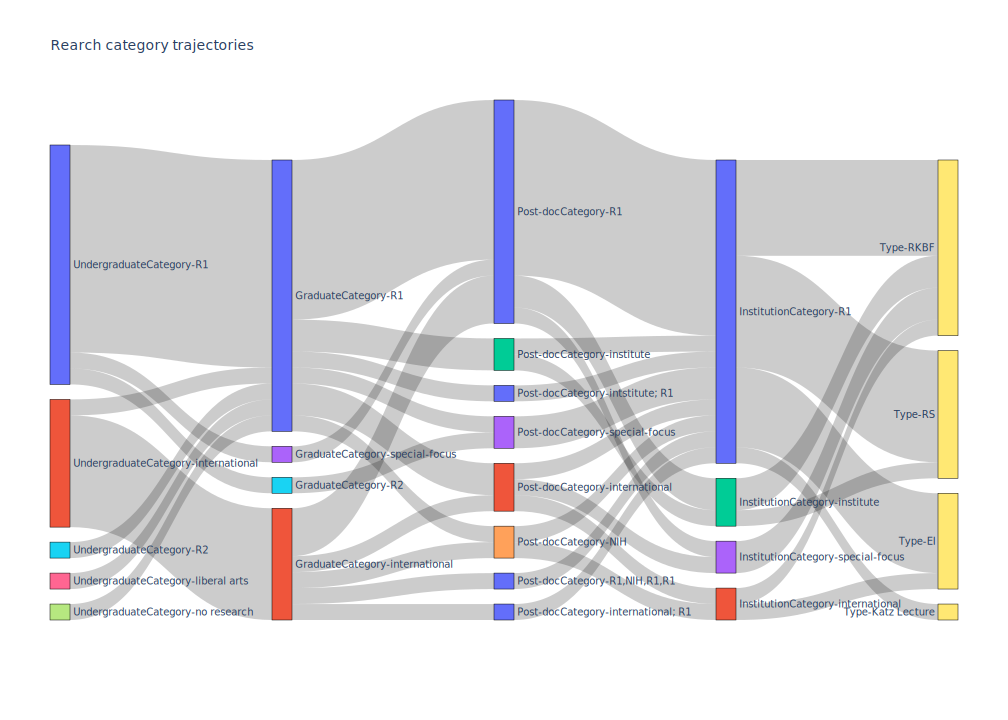

In [18]:
# Research category trajectories
fig = speakerAnalysisProject.genSankey(df,cat_cols=['UndergraduateCategory','GraduateCategory','Post-docCategory','InstitutionCategory','Type'],title='Rearch category trajectories')
handle = plotly.graph_objects.Figure(fig)
handle.update_layout(
    autosize=False,
    width=widthTrajectories*ppi,
    height=heightTrajectories*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/ResearchCategoryTrajectories.svg")

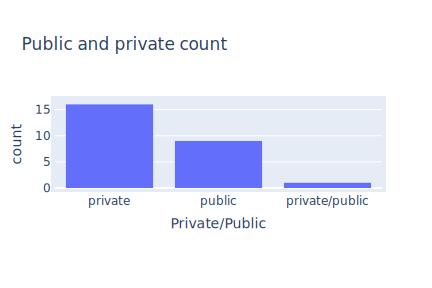

In [19]:
# Is current institution public or private?
widthBar = 6
heightBar = 4
handle = px.histogram(df, x="Private/Public")
handle.update_layout(
    title='Public and private count',
    autosize=False,
    width=widthBar*ppi,
    height=heightBar*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/PublicOrPrivateBar.svg")

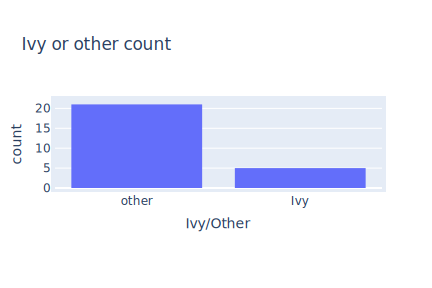

In [20]:
# Is current institution Ivy League or other?
handle = px.histogram(df, x="Ivy/Other")
handle.update_layout(
    title='Ivy or other count',
    autosize=False,
    width=widthBar*ppi,
    height=heightBar*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/IvyOrOtherBar.svg")

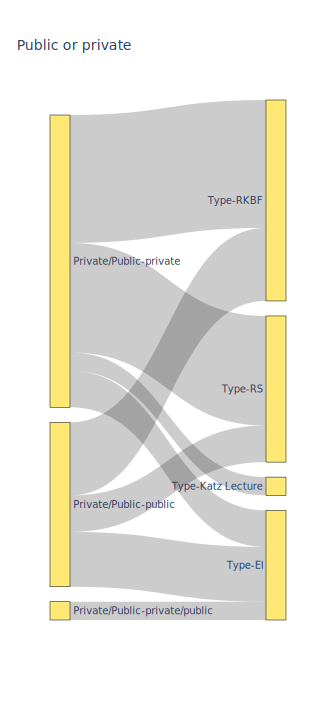

In [29]:
# Public, private, and ivy relationship to speaker type
fig = speakerAnalysisProject.genSankey(df,cat_cols=['Private/Public','Type'],title='Public or private')
handle = plotly.graph_objects.Figure(fig)
handle.update_layout(
    autosize=False,
    width=widthTrajectories*ppi/3,
    height=heightTrajectories*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/PublicOrPrivate.svg")

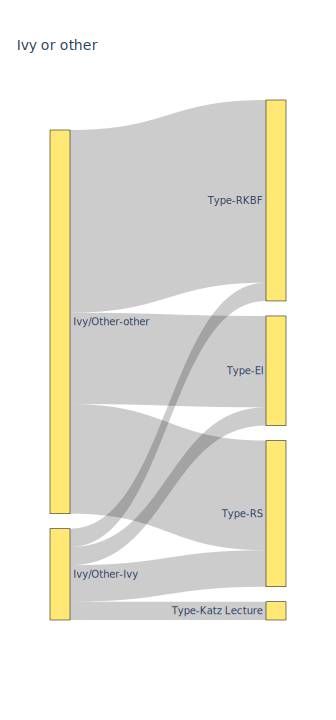

In [30]:
# Ivy or other and relationship to speaker type
fig = speakerAnalysisProject.genSankey(df,cat_cols=['Ivy/Other','Type'],title='Ivy or other')
handle = plotly.graph_objects.Figure(fig)
handle.update_layout(
    autosize=False,
    width=widthTrajectories*ppi/3,
    height=heightTrajectories*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/IvyOrOther.svg")

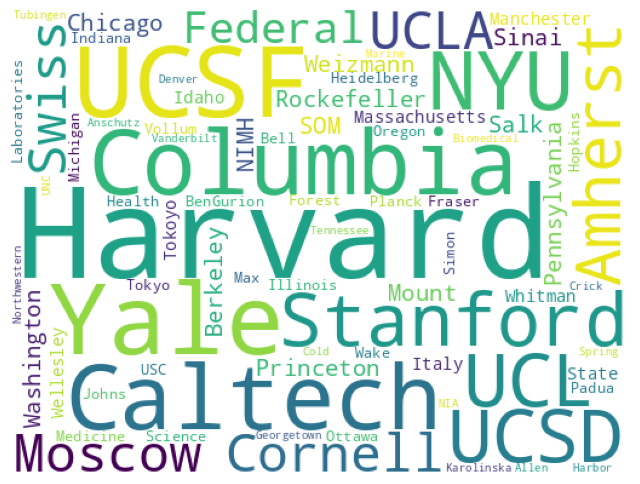

In [23]:
# Make word cloud of institution names
stopwords = ['University','of','College','college','Institute','institute','technology','Technology','U','at','UC','School','school']
plt.subplots(figsize = (8,8))
wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384,
                    stopwords = stopwords
                        ).generate(' '.join(pd.concat([df['UndergraduateName'],df['GraduateName'],df['Post-docName'],df['InstitutionName']])))

plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

#plt.subplots(figsize = (8,8))
# wordcloud = WordCloud (
#                     background_color = 'white',
#                     width = 512,
#                     height = 384,
#                     stopwords = stopwords
#                         ).generate(' '.join(df['GraduateName']))
# plt.imshow(wordcloud) # image show
# plt.axis('off') # to off the axis of x and y
# plt.savefig('Plotly-World_Cloud.png')
# plt.show()

# plt.subplots(figsize = (8,8))
# wordcloud = WordCloud (
#                     background_color = 'white',
#                     width = 512,
#                     height = 384,
#                     stopwords = stopwords
#                         ).generate(' '.join(df['Post-docName']))
# plt.imshow(wordcloud) # image show
# plt.axis('off') # to off the axis of x and y
# plt.savefig('Plotly-World_Cloud.png')
# plt.show()

# plt.subplots(figsize = (8,8))
# wordcloud = WordCloud (
#                     background_color = 'white',
#                     width = 512,
#                     height = 384,
#                     stopwords = stopwords
#                         ).generate(' '.join(df['InstitutionName']))
# plt.imshow(wordcloud) # image show
# plt.axis('off') # to off the axis of x and y
# plt.savefig('Plotly-World_Cloud.png')
# plt.show()

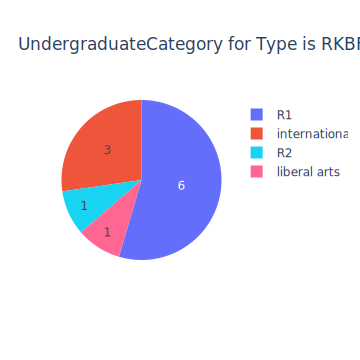

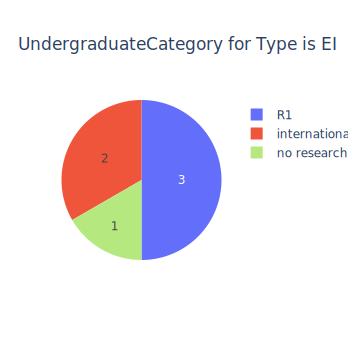

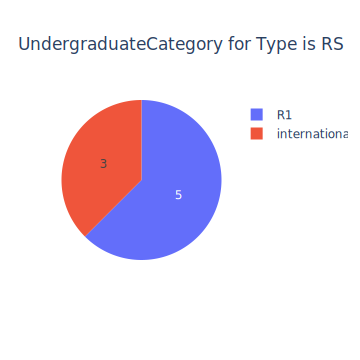

In [24]:
# Conditional relationshipe between undergraduate category and speaker type
targetColumn = 'UndergraduateCategory'
conditionalColumn = 'Type'
conditionalValue = 'RKBF'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[5], colorPalette[6]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/UndergraduateCategory_RKBF.svg")

targetColumn = 'UndergraduateCategory'
conditionalColumn = 'Type'
conditionalValue = 'EI'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[7], colorPalette[6]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/UndergraduateCategory_EI.svg")

targetColumn = 'UndergraduateCategory'
conditionalColumn = 'Type'
conditionalValue = 'RS'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[7], colorPalette[5], colorPalette[6]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/UndergraduateCategory_RS.svg")

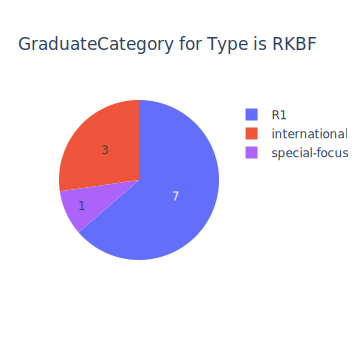

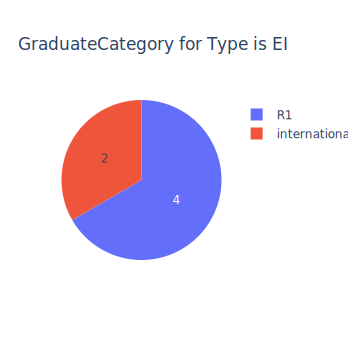

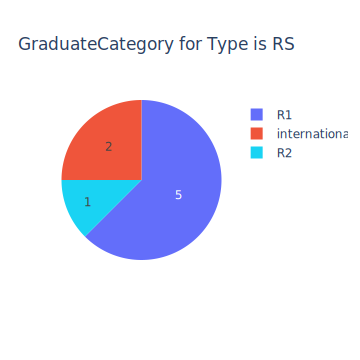

In [25]:
# Conditional relationshipe between graduate category and speaker type
targetColumn = 'GraduateCategory'
conditionalColumn = 'Type'
conditionalValue = 'RKBF'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[3], colorPalette[9], colorPalette[10], colorPalette[1]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/GraduateCategory_RKBF.svg")

conditionalColumn = 'Type'
conditionalValue = 'EI'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[3], colorPalette[6]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/GraduateCategory_EI.svg")

conditionalColumn = 'Type'
conditionalValue = 'RS'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[5], colorPalette[5], colorPalette[6]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/GraduateCategory_RS.svg")

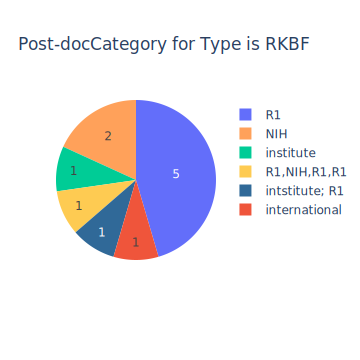

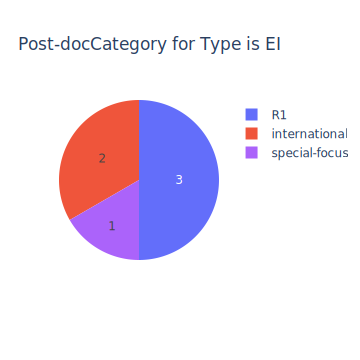

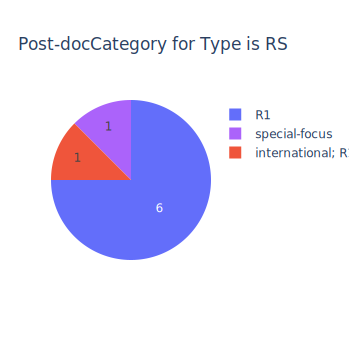

In [26]:
# Conditional relationshipe between post-doc category and speaker type
targetColumn = 'Post-docCategory'
conditionalColumn = 'Type'
conditionalValue = 'RKBF'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[4], colorPalette[2], colorPalette[9], colorPalette[10], colorPalette[1]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/PostDocCategory_RKBF.svg")

conditionalColumn = 'Type'
conditionalValue = 'EI'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[1], colorPalette[3], colorPalette[6]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/PostDocCategory_EI.svg")

conditionalColumn = 'Type'
conditionalValue = 'RS'
test = speakerAnalysisProject.conditionalRelationships(df,targetColumn,conditionalColumn,conditionalValue)

# Current reserach categories
handle = px.pie(test,names=targetColumn,
                color_discrete_sequence=[colorPalette[0], colorPalette[3], colorPalette[1], colorPalette[5], colorPalette[6]],
                title=targetColumn + ' for ' + conditionalColumn + ' is ' + conditionalValue
                )
handle.update_traces(textinfo='value')
handle.update_layout(
    autosize=False,
    width=widthPie*ppi,
    height=heightPie*ppi,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)
handle.show(renderer='svg')
handle.write_image("/mnt/Lisberger/Presentations/Retreat/PostDocCategory_RS.svg")

In [38]:
import qrcode
# Generate qr for github repo
imgRepo = qrcode.make('https://github.com/swegger/EDI.git')
type(imgRepo)  # qrcode.image.pil.PilImage
imgRepo.save("/mnt/Lisberger/Presentations/Retreat/RepoQR.png")

# Generate qr for google sheet
img = qrcode.make("https://docs.google.com/spreadsheets/d/10vC4mm2HWrlcGIY72Or04t9A3uDUTKhudUAIyPmkF8o/edit?gid=0#gid=0")
type(img)  # qrcode.image.pil.PilImage
img.save("/mnt/Lisberger/Presentations/Retreat/SheetQR.png")
